## PyTorch Autograd Example with Optimization

This example shows how to use AD and PyTorch to perform gradient based optimization on a simple test function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# Example of the McCormick Function
f = lambda x: torch.sin(x[0]+x[1]) + (x[0]-x[1])**2 - 1.5*x[0]+2.5*x[1]+1

x = torch.tensor([-4.0, 4.0], requires_grad=True)
y = f(x)

What does this function look like?

c:\Users\mafuge\AppData\Local\miniforge3\envs\ml4me-student\Lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


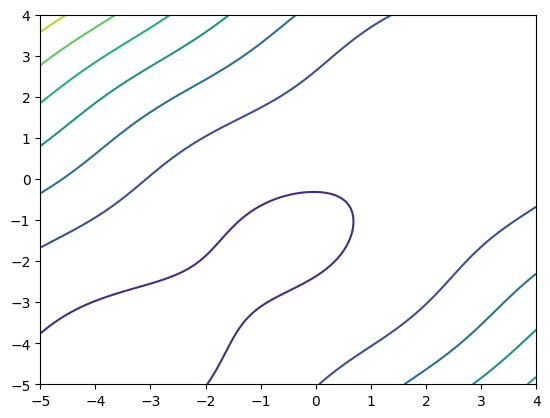

In [3]:
X_plot = torch.meshgrid(torch.linspace(-5,4,100),torch.linspace(-5,4,100))
x_plot,y_plot = X_plot
plt.figure()
plt.contour(x_plot,y_plot,f(X_plot))
plt.show()

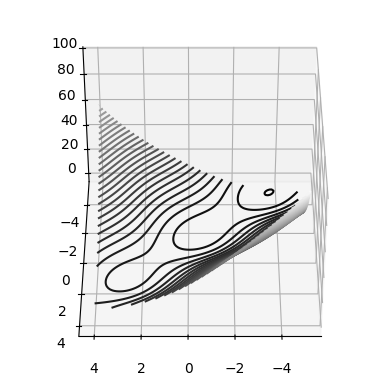

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x_plot, y_plot, f(X_plot), 50, cmap='binary_r')
ax.view_init(40, 90)
plt.show()

Now let's say I want to optimize this. I could compute the analytical derivative. Or, I could compute the backward-mode AD on the inputs:

In [5]:
# Pick a starting point:
x = torch.tensor([-4.0, 4.0], requires_grad=True)
# Evaluate y
y = f(x)
# Now call the backward AD pass so that we can compute gradients
y.backward()
# Now we can get the gradient
x.grad

tensor([-16.5000,  19.5000])

Now we just stick it in a loop and run SGD on it:

In [6]:
# Take an initial guess at the optimum:
x = torch.tensor([-4.0, 4.0], requires_grad=True)
# Note that the true answer should be x_opt = [5, 5]
# Initialize the optimizer
optimizer = torch.optim.AdamW([x], lr=1)
num_steps = 50
steps = [np.array(x.detach().numpy())]
# Take 10 steps
for i in range(num_steps):
    optimizer.zero_grad()
    y = f(x)
    y.backward()
    optimizer.step()
    with torch.no_grad():
        steps.append(np.array(x.detach().numpy()))
        print(x)
steps = np.array(steps)

tensor([-2.9600,  2.9600], requires_grad=True)
tensor([-1.9481,  1.9436], requires_grad=True)
tensor([-0.9857,  0.9653], requires_grad=True)
tensor([-0.1051,  0.0453], requires_grad=True)
tensor([ 0.6508, -0.7906], requires_grad=True)
tensor([ 1.2368, -1.5138], requires_grad=True)
tensor([ 1.6219, -2.0992], requires_grad=True)
tensor([ 1.8020, -2.5325], requires_grad=True)
tensor([ 1.7979, -2.8129], requires_grad=True)
tensor([ 1.6423, -2.9514], requires_grad=True)
tensor([ 1.3704, -2.9664], requires_grad=True)
tensor([ 1.0147, -2.8804], requires_grad=True)
tensor([ 0.6043, -2.7165], requires_grad=True)
tensor([ 0.1659, -2.4983], requires_grad=True)
tensor([-0.2759, -2.2482], requires_grad=True)
tensor([-0.6981, -1.9879], requires_grad=True)
tensor([-1.0796, -1.7375], requires_grad=True)
tensor([-1.4026, -1.5143], requires_grad=True)
tensor([-1.6534, -1.3326], requires_grad=True)
tensor([-1.8238, -1.2020], requires_grad=True)
tensor([-1.9113, -1.1271], requires_grad=True)
tensor([-1.91

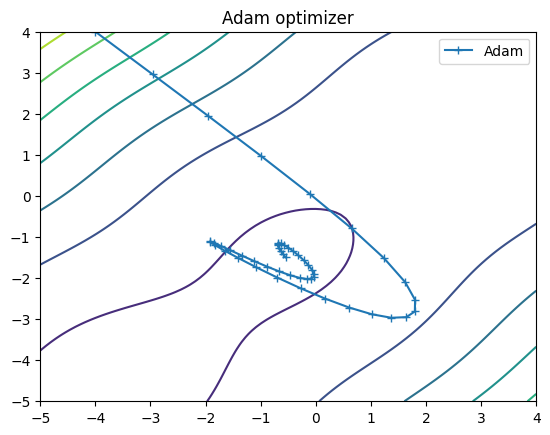

In [7]:
plt.figure()
plt.contour(x_plot,y_plot,f(X_plot))
plt.plot(steps[:,0],steps[:,1],marker='+',label = "Adam")
plt.legend()
plt.title("Adam optimizer")
plt.show()

In [8]:
# Take an initial guess at the optimum:
x = torch.tensor([-4.0, 4.0], requires_grad=True)
# Note that the true answer should be x_opt = [5, 5]
# Initialize the optimizer
# Here using LBFGS, which is much faster convergence on small problems
optimizer = torch.optim.LBFGS([x],lr=0.05)
num_steps = 5
steps = [np.array(x.detach().numpy())]
# Take 10 steps
for i in range(num_steps):
    def closure():
        optimizer.zero_grad()
        y = f(x)
        y.backward()
        return y
    optimizer.step(closure)
    with torch.no_grad():
            steps.append(np.array(x.detach().numpy()))
            print(x)
steps = np.array(steps)

tensor([-1.9382,  0.4356], requires_grad=True)
tensor([-1.0402, -0.8307], requires_grad=True)
tensor([-0.7223, -1.2888], requires_grad=True)
tensor([-0.6097, -1.4543], requires_grad=True)
tensor([-0.5696, -1.5139], requires_grad=True)


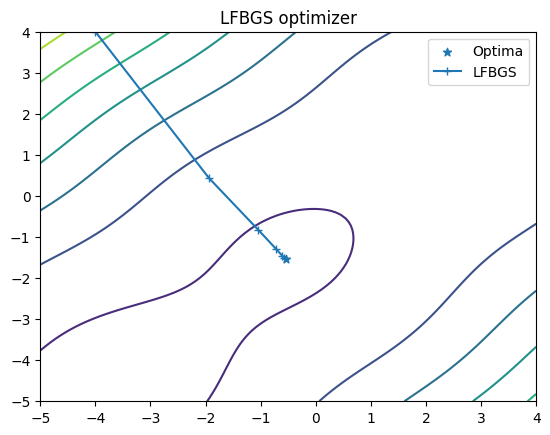

In [9]:
plt.figure()
plt.contour(x_plot,y_plot,f(X_plot))
plt.scatter([-0.54719],[-1.54719],marker='*',label="Optima")
plt.plot(steps[:,0],steps[:,1],marker='+',label = "LFBGS")
plt.legend()
plt.title("LFBGS optimizer")
plt.show()